In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Данные
X1 = np.array([23.2, 20.1, 18.8, 24.1, 21.6, 22.8, 22.1, 25.2, 24.8, 20.6, 25.9, 27.0, 21.9, 23.5, 21.7, 21.1, 21.3, 18.3, 21.0, 23.8, 17.4, 17.3, 17.9, 20.6, 18.4, 24.2, 20.7, 22.0, 18.3, 22.6, 20.2, 21.5, 16.5, 21.3, 21.5, 17.9, 26.2, 29.1])
X2 = np.array([24.2, 30.4, 21.7, 21.2, 20.7, 25.4, 17.8, 19.0, 21.5, 18.7, 22.1, 25.6, 19.6, 19.9, 21.9, 26.4, 21.9, 24.1, 21.1, 23.5, 23.9])

alpha = 0.05
L = 7

1. Средние арифметические и стандартные отклонения

In [ ]:
mean_X1 = np.mean(X1)
mean_X2 = np.mean(X2)
std_X1 = np.std(X1, ddof=1)
std_X2 = np.std(X2, ddof=1)

print(f"Среднее арифметическое X1: {mean_X1}")
print(f"Среднее арифметическое X2: {mean_X2}")
print(f"Эмпирический стандарт (стандартное отклонение) X1: {std_X1}")
print(f"Эмпирический стандарт (стандартное отклонение) X2: {std_X2}")

Среднее арифметическое X1: 21.642105263157895
Среднее арифметическое X2: 22.409523809523808
Эмпирический стандарт (стандартное отклонение) X1: 2.9055986571079924
Эмпирический стандарт (стандартное отклонение) X2: 2.9768951546711815


2. Доверительные интервалы

In [ ]:
# Доверительный интервал для математического ожидания
ci_mean_X1 = stats.t.interval(confidence=1-alpha, df=len(X1)-1, loc=mean_X1, scale=std_X1/np.sqrt(len(X1)))
ci_mean_X2 = stats.t.interval(confidence=1-alpha, df=len(X2)-1, loc=mean_X2, scale=std_X2/np.sqrt(len(X2)))

# Доверительный интервал для стандартного отклонения
ci_std_X1 = (np.sqrt((len(X1)-1)*std_X1**2 / stats.chi2.ppf(1-alpha/2, len(X1)-1)),
             np.sqrt((len(X1)-1)*std_X1**2 / stats.chi2.ppf(alpha/2, len(X1)-1)))

ci_std_X2 = (np.sqrt((len(X2)-1)*std_X2**2 / stats.chi2.ppf(1-alpha/2, len(X2)-1)),
             np.sqrt((len(X2)-1)*std_X2**2 / stats.chi2.ppf(alpha/2, len(X2)-1)))

print(f"Доверительный интервал для математического ожидания X1: {ci_mean_X1}")
print(f"Доверительный интервал для математического ожидания X2: {ci_mean_X2}")
print(f"Доверительный интервал для стандартного отклонения X1: {ci_std_X1}")
print(f"Доверительный интервал для стандартного отклонения X2: {ci_std_X2}")

Доверительный интервал для математического ожидания X1: (20.687058749931463, 22.597151776384326)
Доверительный интервал для математического ожидания X2: (21.054457381309206, 23.76459023773841)
Доверительный интервал для стандартного отклонения X1: (2.3688293925482173, 3.75911028915913)
Доверительный интервал для стандартного отклонения X2: (2.2775008395711684, 4.298843467746116)


3. Проверка гипотезы о равенстве дисперсий

In [ ]:
f_stat, p_value = stats.levene(X1, X2)
print(f"F-статистика: {f_stat}, p-значение: {p_value}")

F-статистика: 0.00012312207647597058, p-значение: 0.9911855695298417


4. Сводная оценка стандартного отклонения (если гипотеза принята)

In [ ]:
if p_value > alpha:
    pooled_std = np.sqrt(((len(X1)-1)*std_X1**2 + (len(X2)-1)*std_X2**2) / (len(X1) + len(X2) - 2))
    print(f"Сводная оценка стандартного отклонения: {pooled_std}")

Сводная оценка стандартного отклонения: 2.9308124938288365


5. Проверка гипотезы о равенстве математических ожиданий

In [ ]:
t_stat, p_value_ttest = stats.ttest_ind(X1, X2, equal_var=(p_value > alpha))
print(f"t-статистика: {t_stat}, p-значение: {p_value_ttest}")

t-статистика: -0.9629853856746327, p-значение: 0.33962255020935406


6. Сводная оценка математического ожидания (если гипотеза принята)

In [ ]:
if p_value_ttest > alpha:
    pooled_mean = (len(X1) * mean_X1 + len(X2) * mean_X2) / (len(X1) + len(X2))
    print(f"Сводная оценка математического ожидания: {pooled_mean}")
    pooled_variance = (1 / (len(X1) + len(X2) - 1)) * (np.sum(X1**2) + np.sum(X2**2) - len(X1) + len(X2) * pooled_mean**2)
    pooled_std = np.sqrt(pooled_variance)
    print(f"Объединенная оценка стандартного отклонения: {pooled_std}")

Сводная оценка математического ожидания: 21.915254237288135
Объединенная оценка стандартного отклонения: 25.89163282966023


7. Проверка нормальности данных

In [ ]:
combined_data = np.concatenate((X1, X2))
k2, p_value_normality = stats.normaltest(combined_data)
print(f"Статистика для проверки на нормальность: {k2}, p-значение: {p_value_normality}")

if p_value_normality > alpha:
    print("Объединенные данные имеют нормальное распределение")
else:
    print("Объединенные данные не имеют нормальное распределение")

Статистика для проверки на нормальность: 3.53395597469448, p-значение: 0.17084851584507033
Объединенные данные имеют нормальное распределение


8. Построение гистограммы

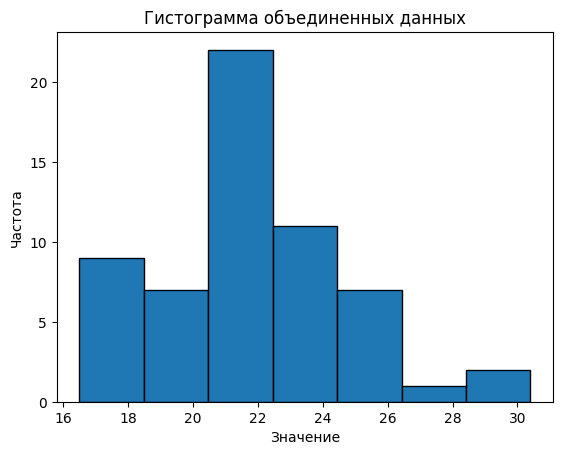

In [ ]:
plt.hist(combined_data, bins=L, edgecolor='black')
plt.title('Гистограмма объединенных данных')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()